In [31]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [32]:
import numpy as np, pandas as pd, sklearn, tensorflow as tf

In [33]:
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [34]:
boston_dataset = pd.read_csv('BostonHousing.csv')
boston_dataset.rename(columns={"medv": "price"}, inplace=True)
boston_dataset.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [35]:
boston_dataset.shape

(506, 14)

In [36]:
boston_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [37]:
boston_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [38]:
boston_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

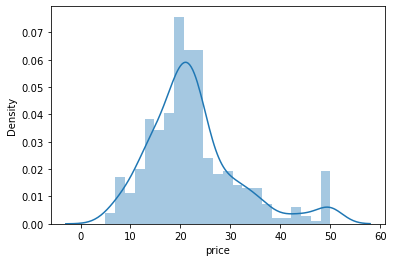

In [39]:
import seaborn as sns
sns.distplot(boston_dataset.price)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price'>

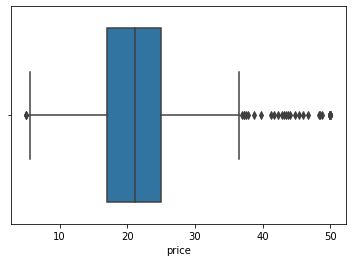

In [40]:
sns.boxplot(boston_dataset.price)

In [41]:
correlation = boston_dataset.corr()
correlation.loc['price']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
price      1.000000
Name: price, dtype: float64

<AxesSubplot:>

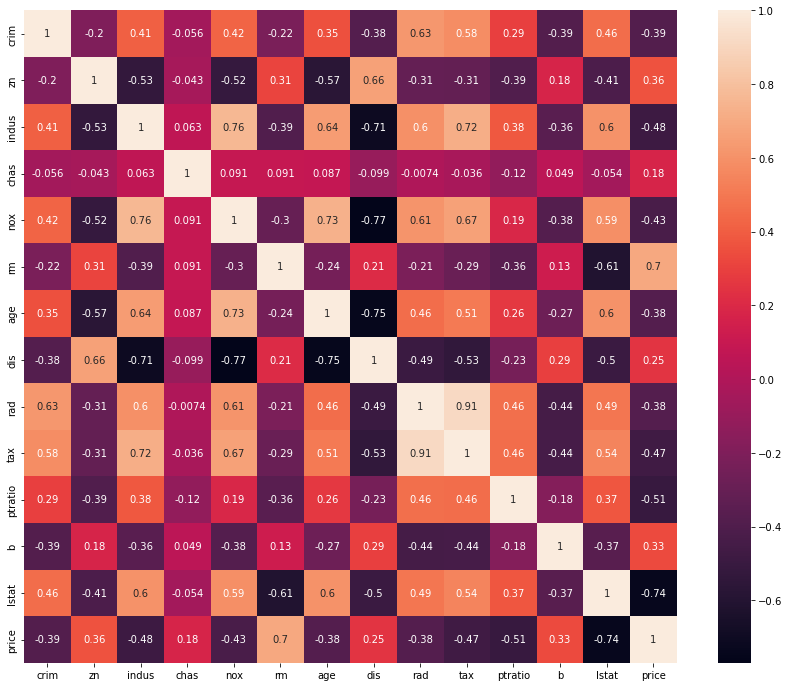

In [42]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(15, 12))
sns.heatmap(correlation,square = True, annot = True)

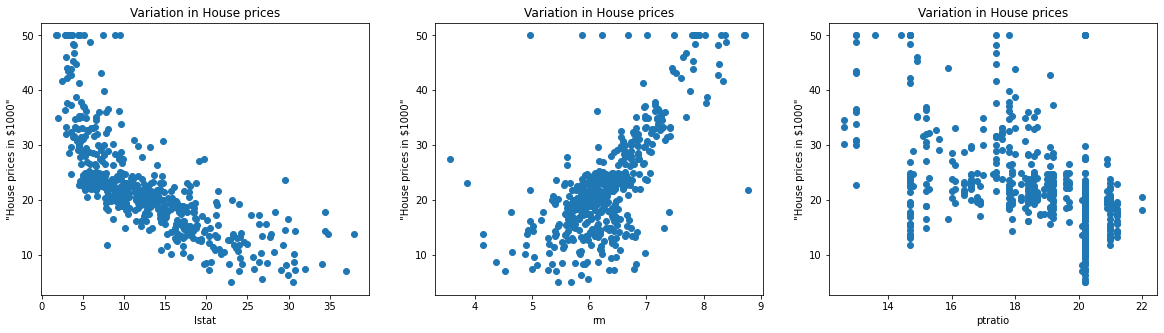

In [43]:
plt.figure(figsize=(20, 5))
features = ['lstat', 'rm', 'ptratio']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston_dataset[col]
    y = boston_dataset.price
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

In [44]:
X = boston_dataset.iloc[:, :-1]
y = boston_dataset.price

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [47]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
y_pred = regressor.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
rmse

4.845250069752438

In [50]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

0.7188942614931373

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=13))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

C:\Users\Lenovo\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [53]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - loss: 580.6959 - mae: 22.5487 - val_loss: 597.0821 - val_mae: 21.7554
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 526.0596 - mae: 21.1418 - val_loss: 494.6119 - val_mae: 19.1681
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 421.4311 - mae: 18.5070 - val_loss: 299.8625 - val_mae: 13.6231
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 211.5349 - mae: 12.4108 - val_loss: 129.2043 - val_mae: 9.7364
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 86.2008 - mae: 7.3507 - val_loss: 69.0908 - val_mae: 7.0011
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 58.4296 - mae: 5.8762 - val_loss: 32.9214 - val_mae: 4.3895
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 35.2226 - mae: 4.3663 - val_loss: 20.9538 - val_mae: 3.6845
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 34.0583 - mae: 4.0524 - val_loss: 19.3413 - val_mae: 3.5092
Epoch 9/100
12/12 ━━━━━

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.4576 - mae: 1.8543 - val_loss: 6.9065 - val_mae: 2.1423
Epoch 55/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.0779 - mae: 1.8374 - val_loss: 6.0964 - val_mae: 1.7363
Epoch 56/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 7.6862 - mae: 2.0718 - val_loss: 7.1608 - val_mae: 2.2106
Epoch 57/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.8088 - mae: 1.9224 - val_loss: 5.4979 - val_mae: 1.8743
Epoch 58/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.5877 - mae: 1.8140 - val_loss: 6.1888 - val_mae: 1.8696
Epoch 59/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 6.2635 - mae: 1.7907 - val_loss: 5.4337 - val_mae: 1.8125
Epoch 60/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4808 - mae: 1.6945 - val_loss: 5.1128 - val_mae: 1.7950
Epoch 61/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 6.3335 - mae: 1.7658 - val_loss: 5.0152 - val_mae: 1.7306
Epoch 62/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 

In [54]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['loss'], name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_loss'], name='Valid'))
fig.update_layout(height=500, width=700,xaxis_title='Epoch',yaxis_title='Loss')
fig.show()

In [55]:
fig = go.Figure()
fig.add_trace(go.Scattergl(y=history.history['mae'],name='Train'))
fig.add_trace(go.Scattergl(y=history.history['val_mae'],name='Valid'))
fig.update_layout(height=500, width=700,xaxis_title='Epoch',yaxis_title='Mean Absolute Error')
fig.show()

## Evaluating The Model

In [56]:
y_pred = model.predict(X_test)
mse_nn, mae_nn = model.evaluate(X_test, y_test)
print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9740 - mae: 2.0348  
Mean squared error on test data:  10.162370681762695
Mean absolute error on test data:  2.2827343940734863


In [57]:
from sklearn.metrics import mean_absolute_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error on test data: ', mse_lr)
print('Mean absolute error on test data: ', mae_lr)

Mean squared error on test data:  23.476448238436006
Mean absolute error on test data:  3.3113070381226066


In [58]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.8783163119530595


In [59]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.8783163119530595


In [60]:
from sklearn.preprocessing import StandardScaler
new_data = StandardScaler().fit_transform(
    ([[0.1, 10.0, 5.0, 0, 0.4, 6.0, 50, 6.0, 1, 400, 20, 300, 10]]))
prediction = model.predict(new_data)
print("Predicted house price:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted house price: [[10.568473]]
